# Time series analyses

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import periodogram
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import date 
import holidays
import importlib

Monterrey = pd.read_csv("Files/Datos_2022_2023_CENTRO_limpios.csv", parse_dates=[0], index_col = "date")
daily_Monterrey = Monterrey.resample('D').mean()

## Funciones 

In [2]:
# Directorio de archivos
import sys
sys.path.append("Funciones")

import Feature_Engineering
import EDA

importlib.reload(Feature_Engineering)
importlib.reload(EDA)

<module 'EDA' from 'c:\\Users\\José Antonio\\Documents\\TEC\\Python\\Multivariados\\Funciones\\EDA.py'>

### Feature Engineering

In [3]:
from Feature_Engineering import add_holiday_feature
from Feature_Engineering import add_weekend_feature
from Feature_Engineering import add_cyclic_feature

### Exploratory time series analysis

In [4]:
from EDA import graficar_serie_tiempo
from EDA import Periodograma
from EDA import Top_10_Periodogram

## Feature Engineering

### Días festivos

In [5]:
daily_Monterrey, festivos_df = add_holiday_feature(daily_Monterrey, 2022, 2023, country='Mexico')
display(festivos_df)


,Fecha,Evento
0,2022-01-01,Año Nuevo
1,2022-02-07,Día de la Constitución
2,2022-03-21,Natalicio de Benito Juárez
3,2022-05-01,Día del Trabajo
4,2022-09-16,Día de la Independencia
5,2022-11-21,Día de la Revolución
6,2022-12-25,Navidad
7,2023-01-01,Año Nuevo
8,2023-02-06,Día de la Constitución
9,2023-03-20,Natalicio de Benito Juárez


### Fines de semana

In [6]:
# Crear la variable dummy para fines de semana
daily_Monterrey = add_weekend_feature(daily_Monterrey)

### Seasonality

In [7]:
daily_Monterrey = add_cyclic_feature(daily_Monterrey, "2022-01-03", 37, column_name="is_37_day_cycle")

In [8]:
daily_Monterrey

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,is_holiday,is_weekend,is_37_day_cycle
date,,,,,,,,,,,,,,,,,,
2022-01-01,1.532500,5.152917,18.902500,24.255833,25.416667,68.583333,29.173750,705.870833,0.0,24.791667,4.329167,0.146958,26.112917,5.733333,185.291667,1,1,0
2022-01-02,1.230000,3.760833,12.312500,16.241667,26.654167,84.875000,11.750000,716.475000,0.0,25.083333,5.183333,0.144375,14.480417,9.766667,80.166667,0,1,0
2022-01-03,1.197500,5.137500,12.600000,17.987500,31.666667,41.916667,7.232083,720.066667,0.0,24.958333,3.546250,0.145375,9.794583,9.208333,77.500000,0,0,1
2022-01-04,1.743333,20.233333,37.887500,58.308333,18.375000,76.000000,30.655417,714.470833,0.0,30.416667,5.975000,0.139417,12.896667,4.737500,171.333333,0,0,0
2022-01-05,1.656250,15.480000,36.303750,51.986667,25.095833,88.120833,27.819458,710.172083,0.0,24.270833,7.105000,0.149083,19.871875,6.280000,167.629167,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-13,0.414167,3.658333,6.512500,10.387500,29.375000,45.041667,12.966667,710.433333,0.0,43.125000,2.087500,0.288542,31.052083,11.570833,64.708333,0,1,0
2023-08-14,0.462083,4.733333,6.866667,11.816667,25.541667,49.208333,13.393333,711.454167,0.0,50.541667,1.983333,0.228000,30.116250,11.745833,81.166667,0,0,0
2023-08-15,0.496667,5.404167,8.300000,13.945833,24.500000,47.833333,13.322500,712.833333,0.0,49.000000,2.200000,0.252042,29.815417,10.370833,72.416667,0,0,0


## PM 10

In [9]:
Monterrey_PM10 = daily_Monterrey[["PM10", "PRS", "RAINF", "RH", "SO2", "SR", "TOUT", "WSR", "WDR", "is_holiday", "is_weekend", "is_37_day_cycle"]]

c:\Users\José Antonio\Documents\TEC\Python\Multivariados\Funciones\EDA.py:143: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


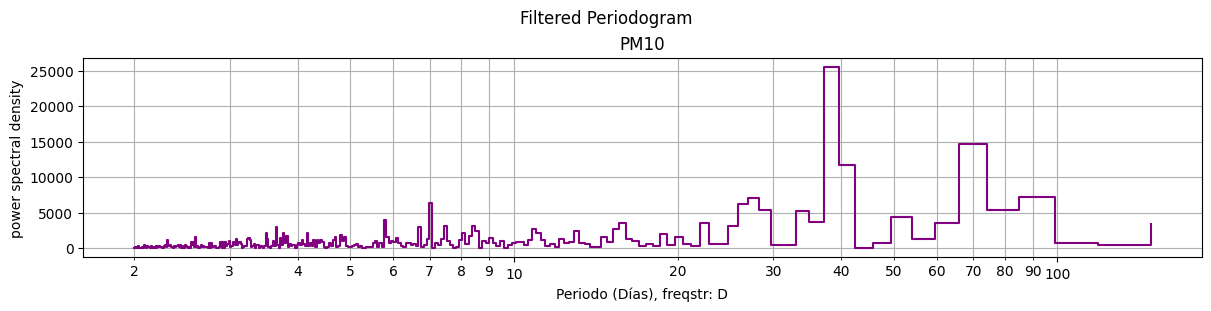

In [10]:
list_periods_spectra = Periodograma(Monterrey_PM10["PM10"], detrend="constant")

In [11]:
Top_10_Periodogram(Monterrey_PM10, list_periods_spectra)


Top 10 para la variable 'PM10':


,top_periods,top_spectra
0,37.125000,25509.197798
1,66.000000,14698.317947
2,39.600000,11701.638993
3,84.857143,7251.154529
4,27.000000,7056.574430
5,6.988235,6307.087002
6,25.826087,6163.770395
7,28.285714,5322.332056
8,74.250000,5314.997534
9,33.000000,5216.153448


In [12]:
graficar_serie_tiempo(Monterrey_PM10, "PM10", ["is_holiday", "is_weekend", "is_37_day_cycle"])

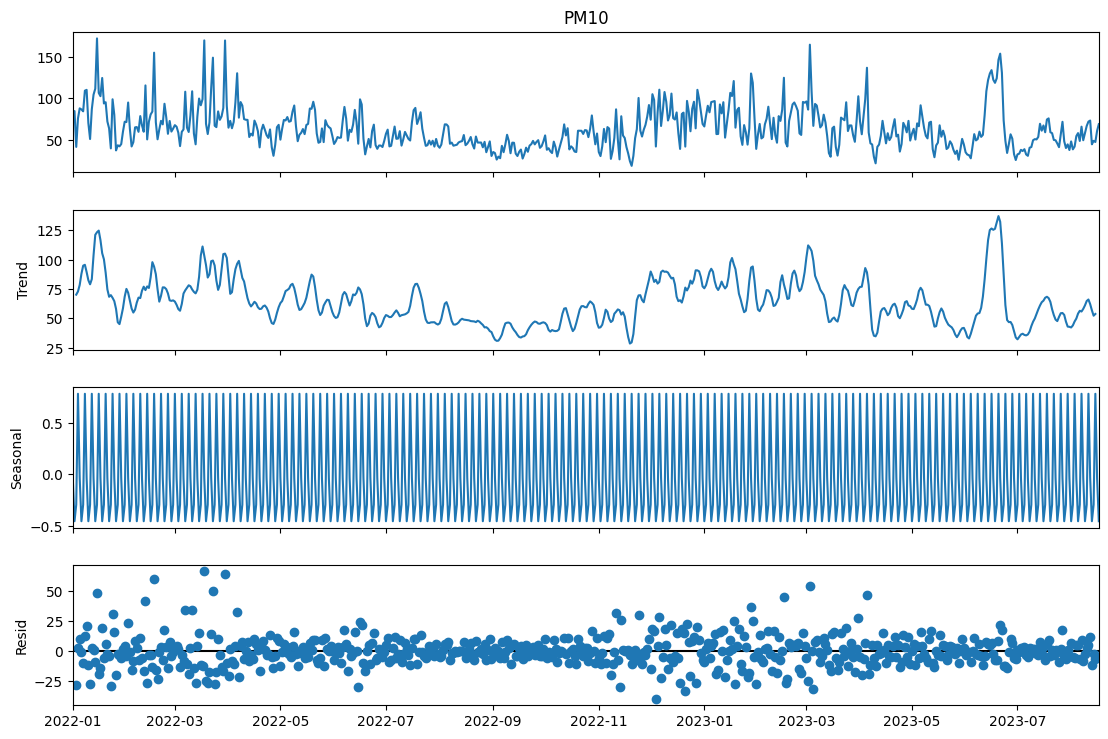

In [13]:
# Descomposición estacional de la serie temporal
seasonal_monterrey_pm10 = seasonal_decompose(Monterrey_PM10["PM10"], model='additive', period=4)

# Obtener la figura generada por la descomposición
fig = seasonal_monterrey_pm10.plot()

# Ajustar el tamaño de la figura
fig.set_size_inches(12, 8)  # Cambia (12, 8) por las dimensiones deseadas

# Mostrar el gráfico
plt.show()

## SO2

## CO

In [14]:
Monterrey_CO = daily_Monterrey[["CO", "PRS", "RAINF", "RH", "SO2", "SR", "TOUT", "WSR", "WDR"]]

## NOX

In [15]:
Monterrey_NOX = daily_Monterrey[["NOX", "PRS", "RAINF", "RH", "SO2", "SR", "TOUT", "WSR", "WDR"]]

## COV (No viene)

## NH3